<a href="https://colab.research.google.com/github/GaneshAthipatla/MACHINE-LEARNING-LAB--336L/blob/main/ML_LAB_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Implement Linear Regression and calculate sum of residual error on the following Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
 Compute the regression coefficients using analytic formulation and calculate Sum
Squared Error (SSE) and R 2 value.  
 Implement gradient descent (both Full-batch and Stochastic with stopping
criteria) on Least Mean Square loss formulation to compute the coefficients of
regression matrix and compare the results using performance measures such as R 2
SSE etc.

Analytical solution:
Coefficients (beta): [1.23636364 1.16969697]
Sum Squared Error (SSE): 5.624242424242421
R-squared value: 0.952538038613988


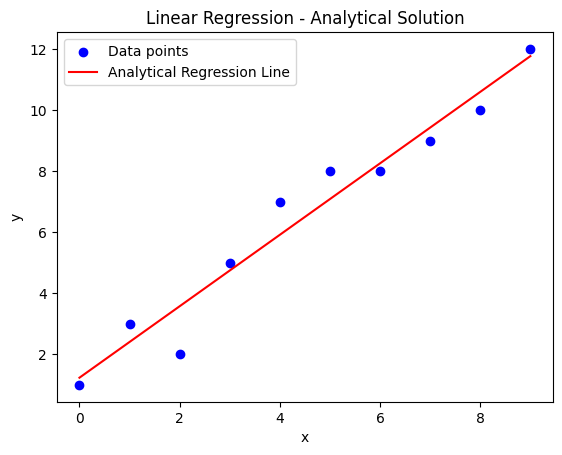


Full-batch Gradient Descent:
Coefficients (beta): [1.23280995 1.17026369]
Sum Squared Error (SSE): 5.624279406496133
R-squared value: 0.9525377265274588

Stochastic Gradient Descent:
Coefficients (beta): [1.23764417 1.17641037]
Sum Squared Error (SSE): 5.6378774040848665
R-squared value: 0.9524229754929547


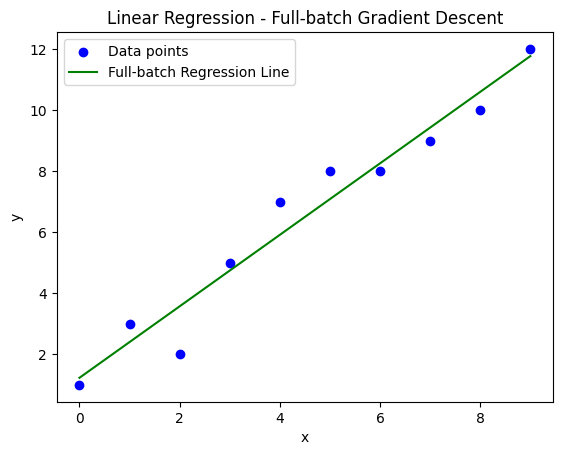

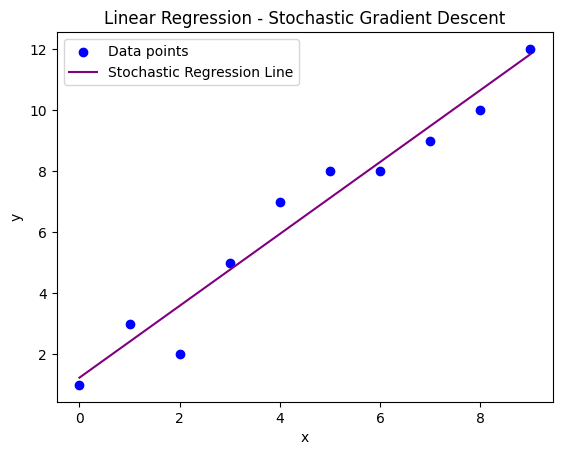

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

def linear_regression_analytical(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

beta_analytical = linear_regression_analytical(x, y)
y_pred_analytical = beta_analytical[0] + beta_analytical[1] * x
sse_analytical = np.sum((y - y_pred_analytical)**2)
y_mean = np.mean(y)
sst = np.sum((y - y_mean)**2)
r_squared_analytical = 1 - (sse_analytical / sst)

print("Analytical solution:")
print("Coefficients (beta):", beta_analytical)
print("Sum Squared Error (SSE):", sse_analytical)
print("R-squared value:", r_squared_analytical)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_analytical, color='red', label='Analytical Regression Line')
plt.title('Linear Regression - Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

def full_batch_gradient_descent(x, y, learning_rate=0.001, epochs=1000, tolerance=1e-5):
    beta = np.zeros(2)
    m = len(x)

    for epoch in range(epochs):
        y_pred = beta[0] + beta[1] * x
        gradient = np.array([
            -2 * np.sum(y - y_pred),
            -2 * np.sum((y - y_pred) * x)
        ])
        beta -= learning_rate * gradient
        sse = np.sum((y - y_pred)**2)
        if np.linalg.norm(gradient) < tolerance:
            break

    return beta, sse

def stochastic_gradient_descent(x, y, learning_rate=0.001, epochs=1000, tolerance=1e-5):
    beta = np.zeros(2)
    m = len(x)

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(m):
            y_pred = beta[0] + beta[1] * x_shuffled[i]
            gradient = np.array([
                -2 * (y_shuffled[i] - y_pred),
                -2 * (y_shuffled[i] - y_pred) * x_shuffled[i]
            ])
            beta -= learning_rate * gradient
            sse = np.sum((y - (beta[0] + beta[1] * x))**2)
            if np.linalg.norm(gradient) < tolerance:
                return beta, sse

    return beta, sse

beta_full_batch, sse_full_batch = full_batch_gradient_descent(x, y)
y_pred_full_batch = beta_full_batch[0] + beta_full_batch[1] * x
r_squared_full_batch = 1 - (sse_full_batch / sst)

beta_stochastic, sse_stochastic = stochastic_gradient_descent(x, y)
y_pred_stochastic = beta_stochastic[0] + beta_stochastic[1] * x
r_squared_stochastic = 1 - (sse_stochastic / sst)

print("\nFull-batch Gradient Descent:")
print("Coefficients (beta):", beta_full_batch)
print("Sum Squared Error (SSE):", sse_full_batch)
print("R-squared value:", r_squared_full_batch)

print("\nStochastic Gradient Descent:")
print("Coefficients (beta):", beta_stochastic)
print("Sum Squared Error (SSE):", sse_stochastic)
print("R-squared value:", r_squared_stochastic)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_full_batch, color='green', label='Full-batch Regression Line')
plt.title('Linear Regression - Full-batch Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_stochastic, color='purple', label='Stochastic Regression Line')
plt.title('Linear Regression - Stochastic Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (Full-batch, stochastic) on LMS loss formulation to compute the coefficients of regression matrix and compare the results.

In [2]:
from sklearn import datasets
import pandas as ps

data_set = datasets.fetch_california_housing()
data_set

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df = ps.DataFrame(data_set.data,columns=data_set.feature_names)
df['MedHouseVal'] = data_set.target
df.head()

In [4]:
a = df.drop('MedHouseVal',axis='columns')
b = df['MedHouseVal']

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(a,b,test_size=0.4,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [7]:
import numpy as np
y_pred=np.array(reg.predict(x_test))
y_pred

array([2.11943202, 0.94409728, 2.69396502, ..., 1.67823887, 2.07063939,
       1.85536554])

In [8]:
reg.score(x_test,y_test)

0.6068373239208653

In [9]:
len(y_train)


12384

In [10]:
correlation = df.corr()['MedHouseVal'].drop('MedHouseVal')
print("\nCorrelation with 'MedHouseVal':")
print(correlation)


Correlation with 'MedHouseVal':
MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: MedHouseVal, dtype: float64


In [11]:
class LinearRegression:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-4):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.coef_ = None

    def fit_analytic(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute coefficients using closed-form solution
        self.coef_ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def fit_gradient_descent(self, X, y, method='full-batch'):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize coefficients
        self.coef_ = np.random.randn(X_b.shape[1])

        # Gradient descent
        if method == 'full-batch':
            for _ in range(self.max_iter):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.coef_) - y)
                self.coef_ -= self.lr * gradients
        elif method == 'stochastic':
            for epoch in range(self.max_iter):
                for i in range(len(X_b)):
                    random_index = np.random.randint(len(X_b))
                    xi = X_b[random_index:random_index+1]
                    yi = y[random_index:random_index+1]
                    gradients = 2 * xi.T.dot(xi.dot(self.coef_) - yi)
                    self.coef_ -= self.lr * gradients

    def predict(self, X):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coef_)


# Attribute with highest correlation with MedHouseVal
best_attribute = correlation.abs().idxmax()
print("\nAttribute with highest correlation with MedHouseVal:", best_attribute)

# Prepare data
X = df[[best_attribute]].values
y = df['MedHouseVal'].values

# Create and fit the models
lr_analytic = LinearRegression()
lr_analytic.fit_analytic(X, y)

lr_full_batch = LinearRegression()
lr_full_batch.fit_gradient_descent(X, y, method='full-batch')

lr_stochastic = LinearRegression()
lr_stochastic.fit_gradient_descent(X, y, method='stochastic')

# Compare coefficients
print("\nAnalytic solution coefficients:", lr_analytic.coef_)
print("Full-batch gradient descent coefficients:", lr_full_batch.coef_)
print("Stochastic gradient descent coefficients:", lr_stochastic.coef_)



Attribute with highest correlation with MedHouseVal: MedInc

Analytic solution coefficients: [0.45085577 0.41793849]
Full-batch gradient descent coefficients: [0.43975904 0.42027216]
Stochastic gradient descent coefficients: [0.57158244 0.41172775]
